In [1]:
import warnings
import numpy as np
import numba
import matplotlib.pyplot as plt
from coffea.nanoevents import NanoEventsFactory

import awkward as ak

/cvmfs/cms.cern.ch/slc7_amd64_gcc10/external/py3-setuptools/60.9.3-ddcab3b6a742c72fed5554de8ccaaf18/lib/python3.9/site-packages/_distutils_hack/__init__.py:17: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/cvmfs/cms.cern.ch/slc7_amd64_gcc10/external/py3-setuptools/60.9.3-ddcab3b6a742c72fed5554de8ccaaf18/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
fn = "Hqq_SM_123.root"
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    events_1 = NanoEventsFactory.from_root(fn).events()

In [3]:
fn = "VBF_SM_interfVH_123.root"
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    events_2 = NanoEventsFactory.from_root(fn).events()

In [4]:
fn = "VBF_SM_NOinterfVH_123.root"
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    events_3 = NanoEventsFactory.from_root(fn).events()

In [5]:
def mjj(e):
     
    j1 = ak.firsts(e.GenJet[:,0:1])
    j2 = ak.firsts(e.GenJet[:,1:2])
    
    return (j1 + j2).mass   

In [6]:
def deta(e):
    
    j1 = ak.firsts(e.GenJet[:,0:1])
    j2 = ak.firsts(e.GenJet[:,1:2])
    
    return abs(j1.eta - j2.eta)

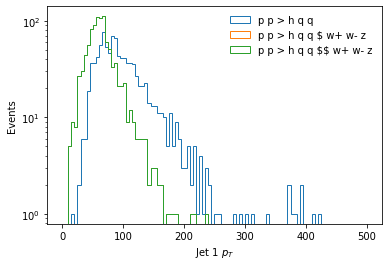

In [7]:
plt.hist(events_1.GenJet.pt[:,0:1],histtype='step',bins=np.linspace(0,500,101),label='p p > h q q')
plt.hist(events_2.GenJet.pt[:,0:1],histtype='step',bins=np.linspace(0,500,101),label='p p > h q q \$ w+ w- z')
plt.hist(events_3.GenJet.pt[:,0:1],histtype='step',bins=np.linspace(0,500,101),label='p p > h q q \$\$ w+ w- z')

plt.yscale('log')
plt.ylabel('Events')
plt.xlabel(r'Jet 1 $p_T$')

plt.legend(frameon=False)

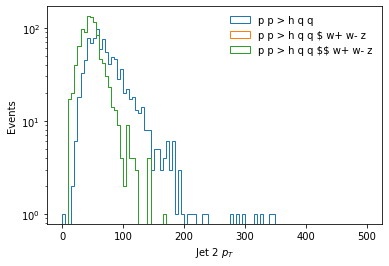

In [8]:
plt.hist(ak.firsts(events_1.GenJet.pt[:,1:2]),histtype='step',bins=np.linspace(0,500,101),label='p p > h q q')
plt.hist(ak.firsts(events_2.GenJet.pt[:,1:2]),histtype='step',bins=np.linspace(0,500,101),label='p p > h q q \$ w+ w- z')
plt.hist(ak.firsts(events_3.GenJet.pt[:,1:2]),histtype='step',bins=np.linspace(0,500,101),label='p p > h q q \$\$ w+ w- z')

plt.yscale('log')
plt.ylabel('Events')
plt.xlabel(r'Jet 2 $p_T$')

plt.legend(frameon=False)

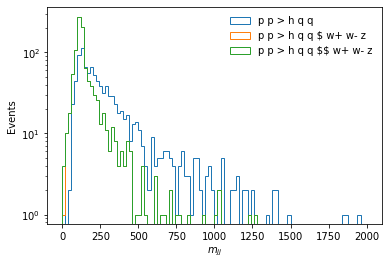

In [9]:
plt.hist(mjj(events_1),histtype='step',bins=np.linspace(0,2000,101),label='p p > h q q')
plt.hist(mjj(events_2),histtype='step',bins=np.linspace(0,2000,101),label='p p > h q q \$ w+ w- z')
plt.hist(mjj(events_3),histtype='step',bins=np.linspace(0,2000,101),label='p p > h q q \$\$ w+ w- z')

plt.yscale('log')
plt.ylabel('Events')
plt.xlabel(r'$m_{jj}$')

plt.legend(frameon=False)

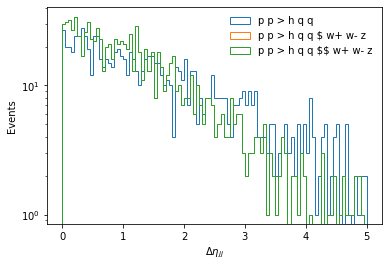

In [10]:
plt.hist(deta(events_1),histtype='step',bins=np.linspace(0,5,101),label='p p > h q q')
plt.hist(deta(events_2),histtype='step',bins=np.linspace(0,5,101),label='p p > h q q \$ w+ w- z')
plt.hist(deta(events_3),histtype='step',bins=np.linspace(0,5,101),label='p p > h q q \$\$ w+ w- z')

plt.yscale('log')
plt.ylabel('Events')
plt.xlabel(r'$\Delta\eta_{jj}$')

plt.legend(frameon=False)